<div style = "text-align: center;">
    <h1>
        Titanic Survival Prediction
    </h1>
</div>


<h2>Importing necessary Libraries</h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from warnings import filterwarnings
filterwarnings("ignore")

<h2>Loading the Dataset</h2>

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>Data Cleaning and Preprocessing</h2>

In [3]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [4]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [5]:
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


<h2>Data Analysis</h2>

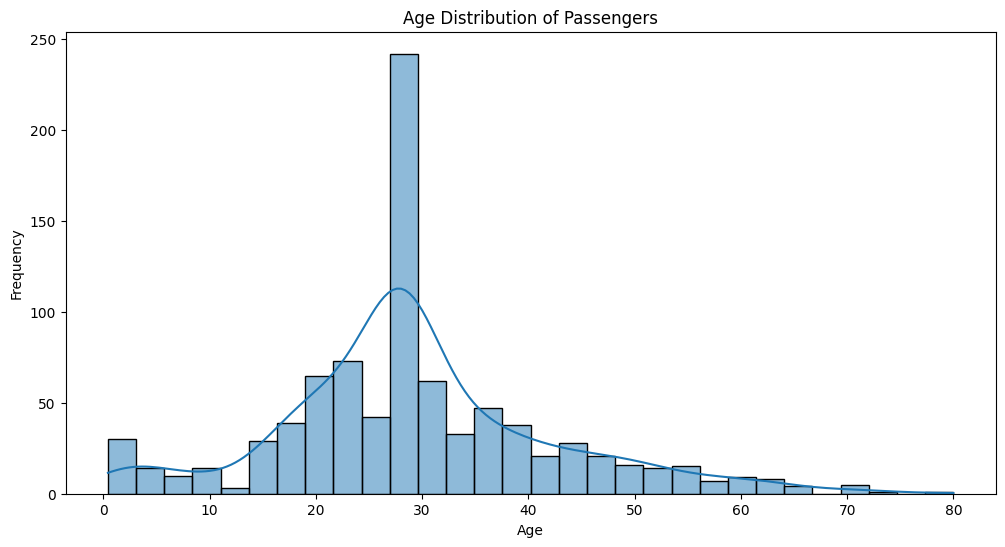

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

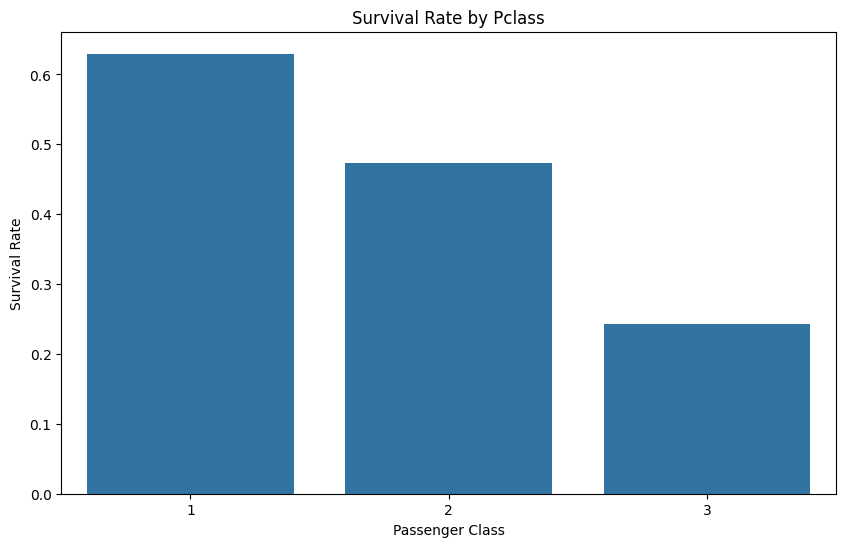

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

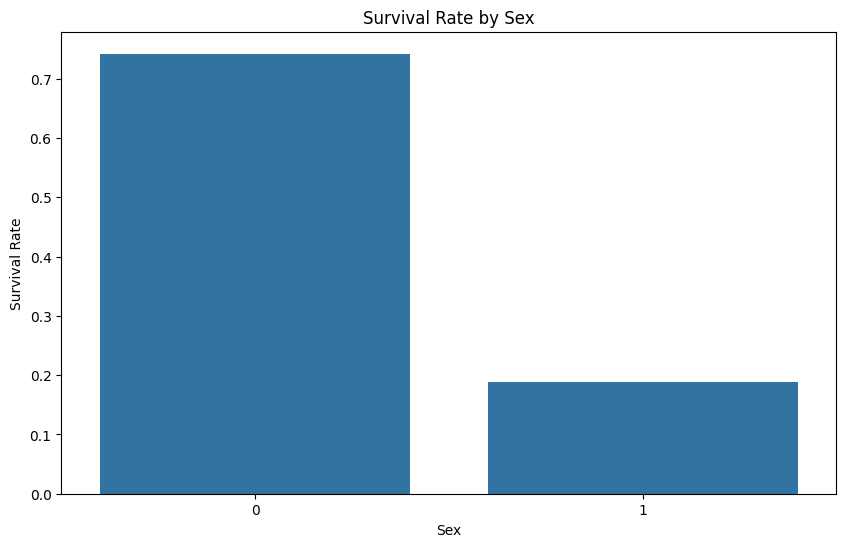

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

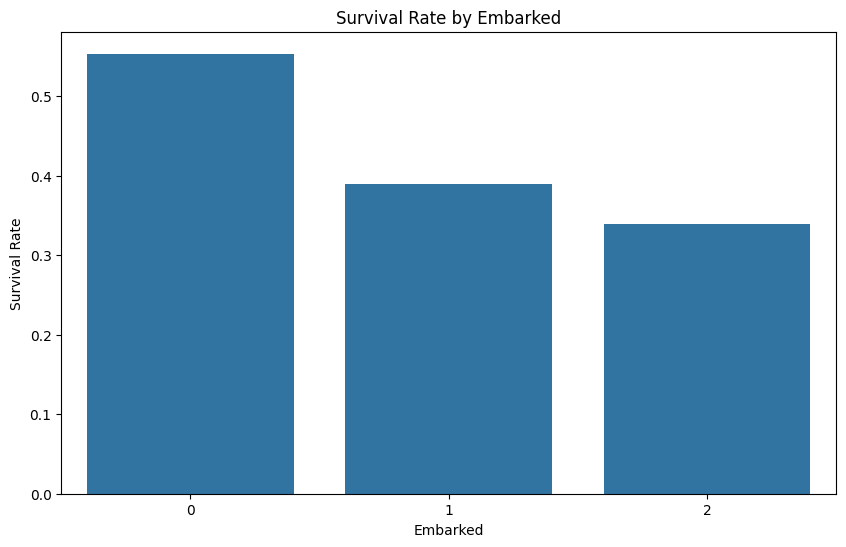

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=data, ci=None)
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

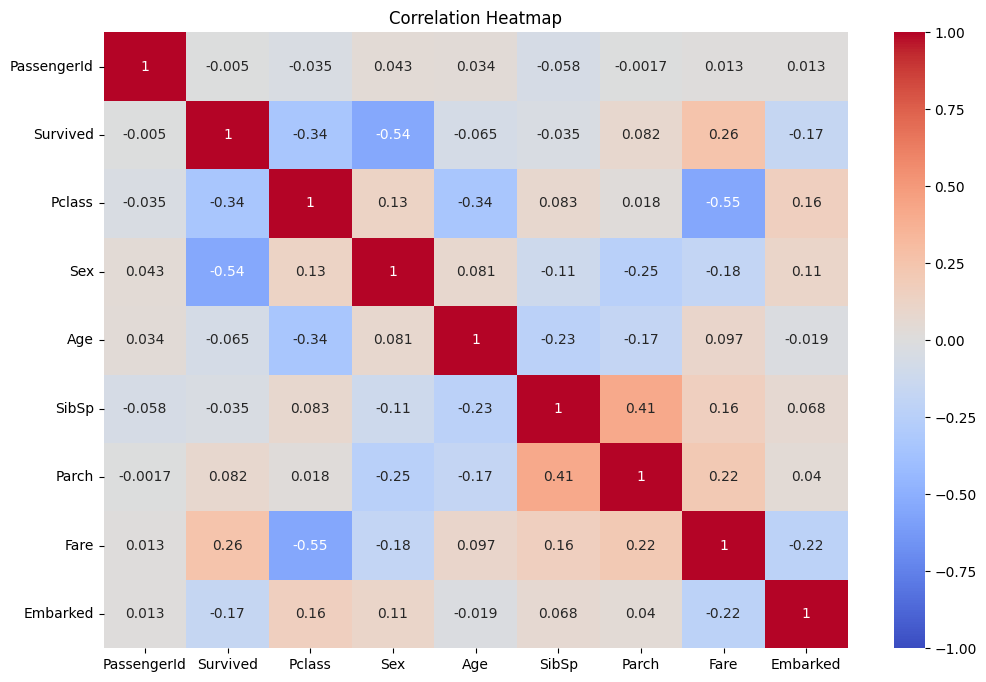

In [10]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

<h2>Percentage of Passengers who survived</h2>

In [11]:
survival_percentage = data['Survived'].mean() * 100
print(f"Percentage of passengers who survived: {survival_percentage:.2f}%")

Percentage of passengers who survived: 38.38%


<h2>Training the model</h2>

In [12]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<h2>Model Prediction</h2>

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8171641791044776
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.70      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

